<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head().T


,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.000,83807.860,159660.800,0.000,125510.820
NumOfProducts,1,1,3,2,1


In [4]:
df.shape

(10000, 14)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [8]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
df.shape

(10000, 11)

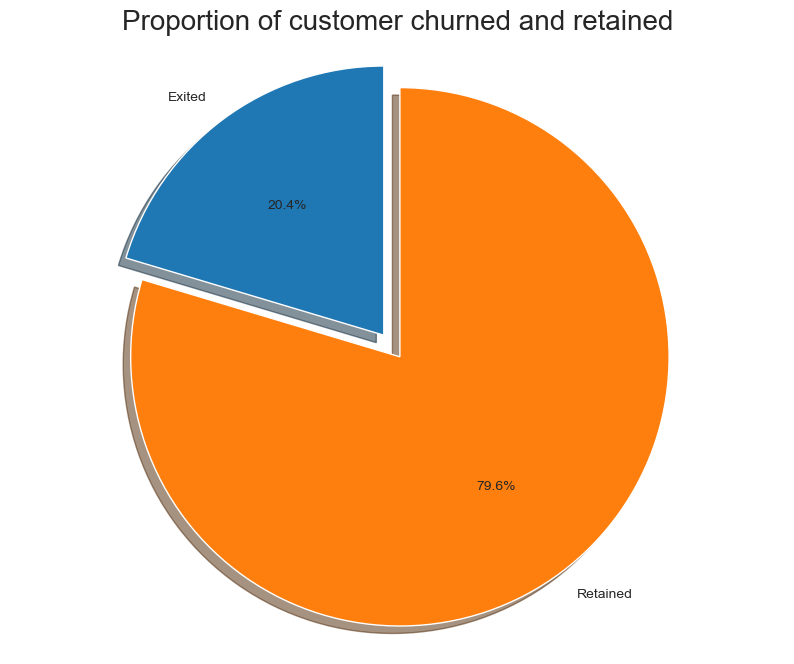

In [11]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

0    7963
1    2037
Name: Exited, dtype: int64

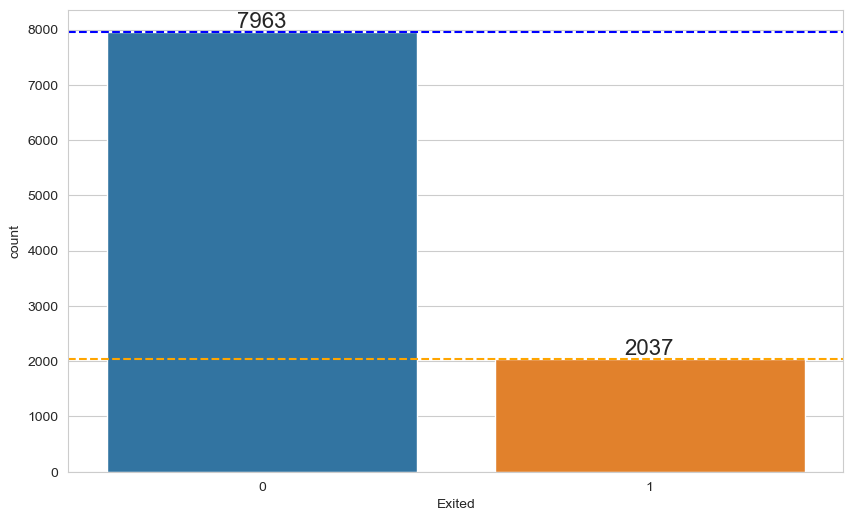

In [12]:
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');

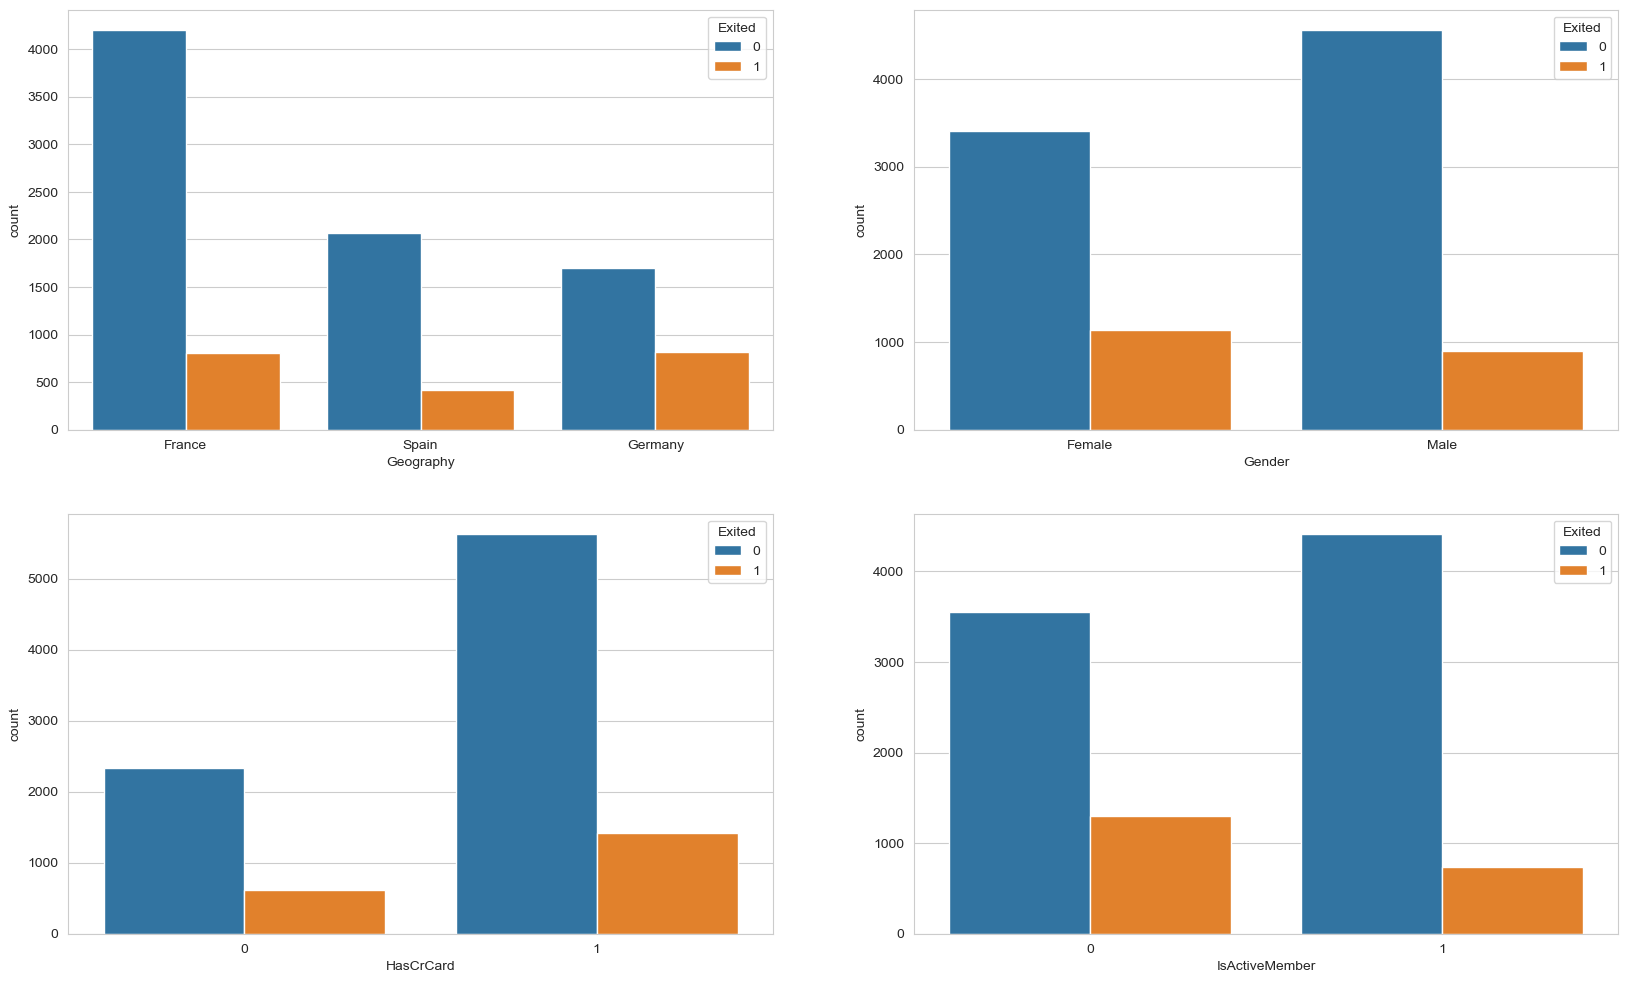

In [13]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

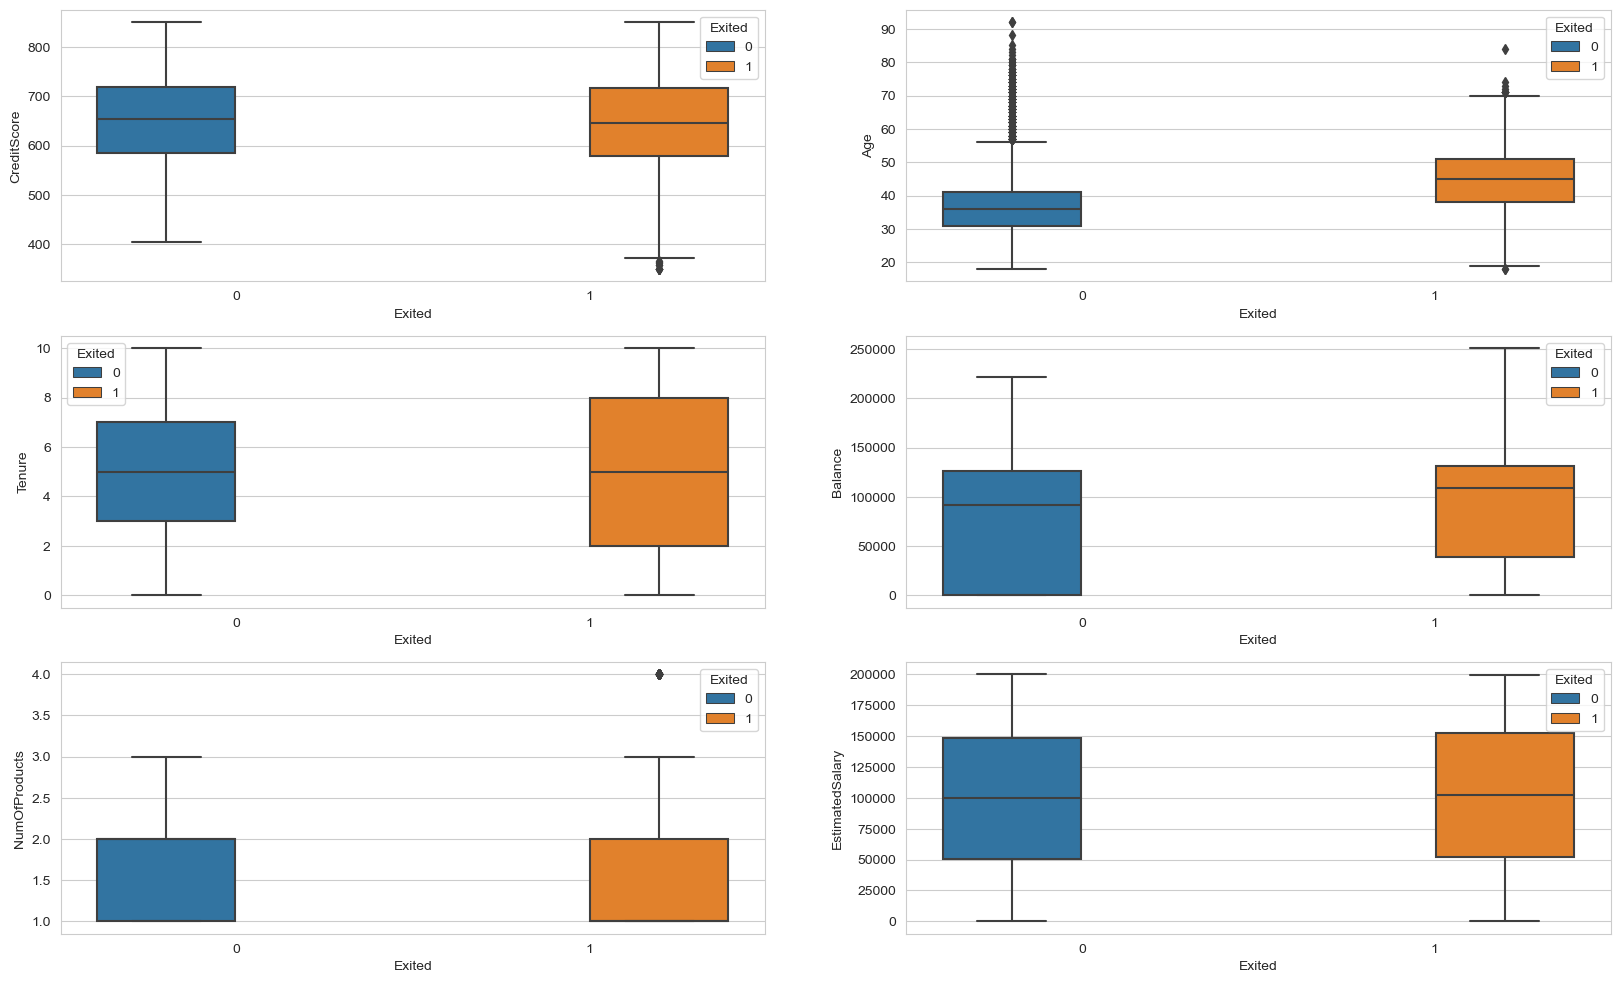

In [13]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1]);

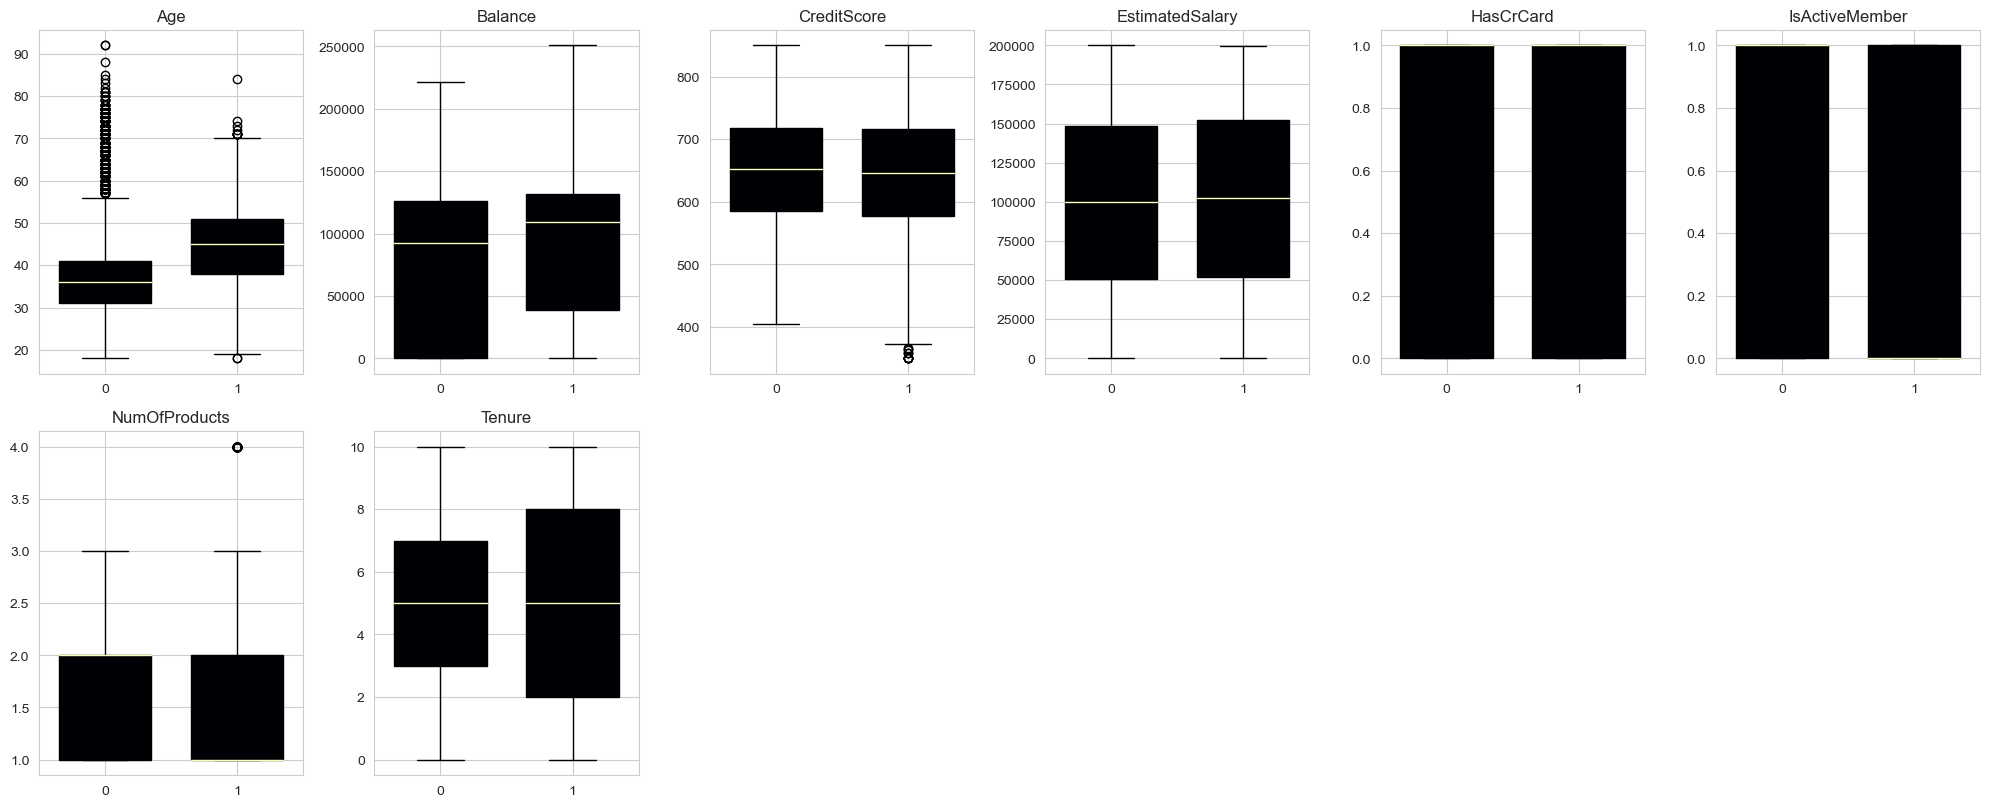

In [14]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

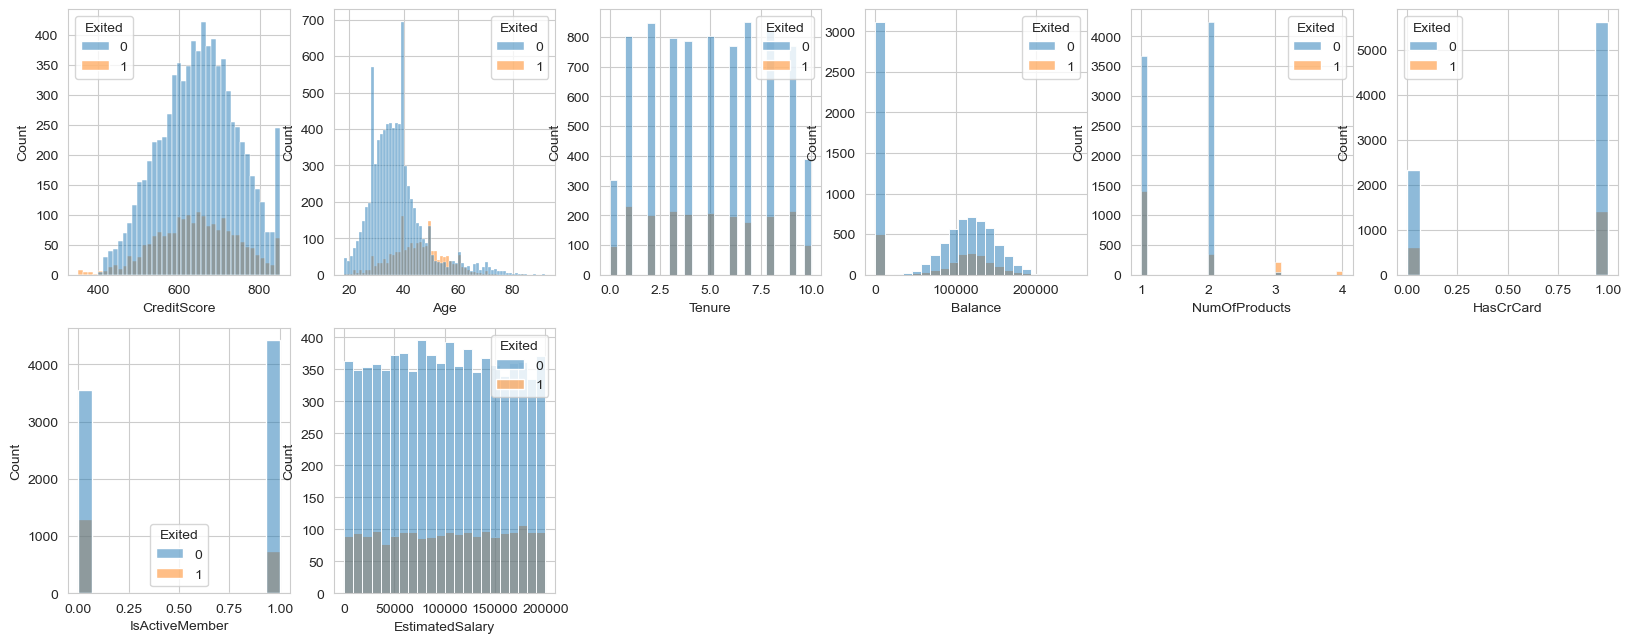

In [15]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

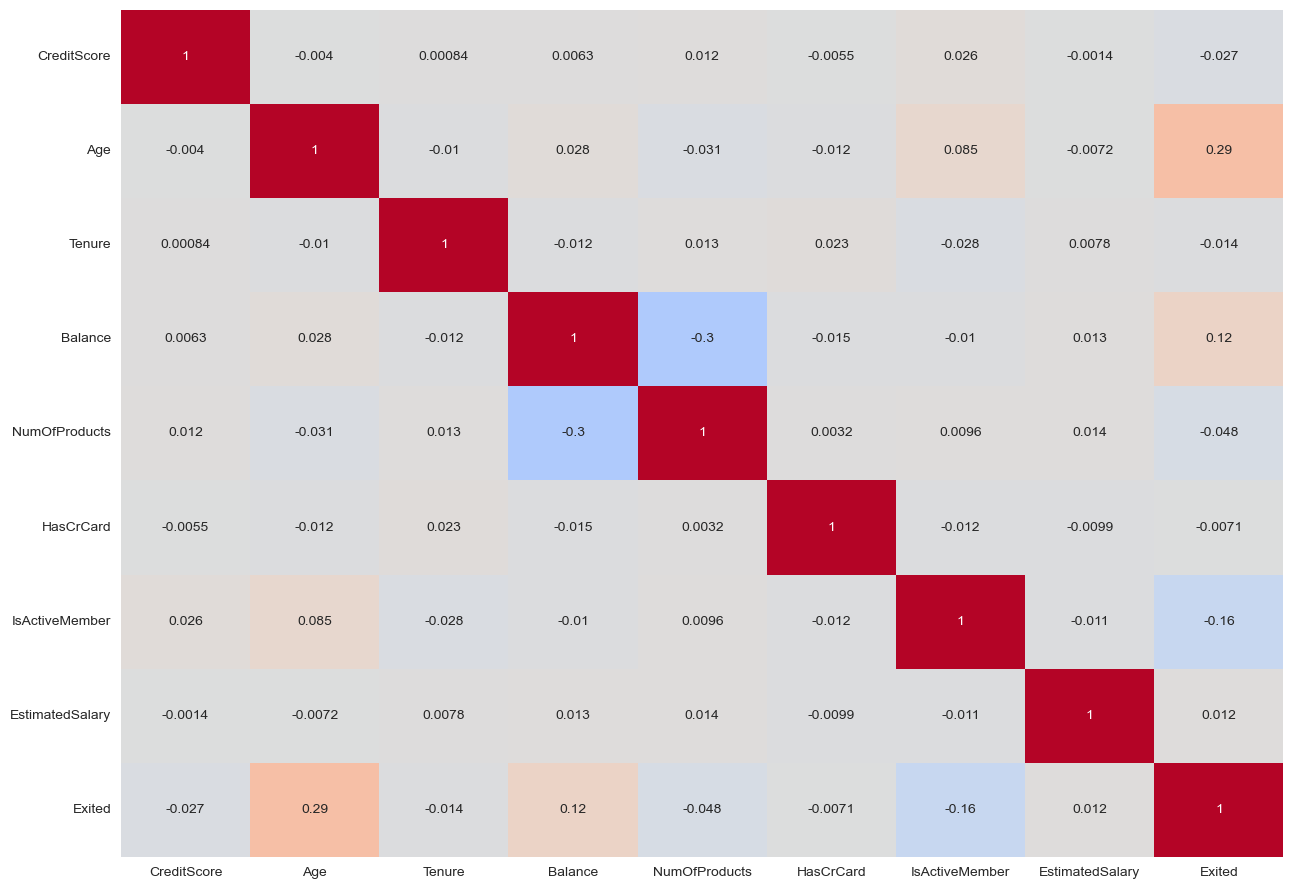

In [20]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False) 
plt.show()

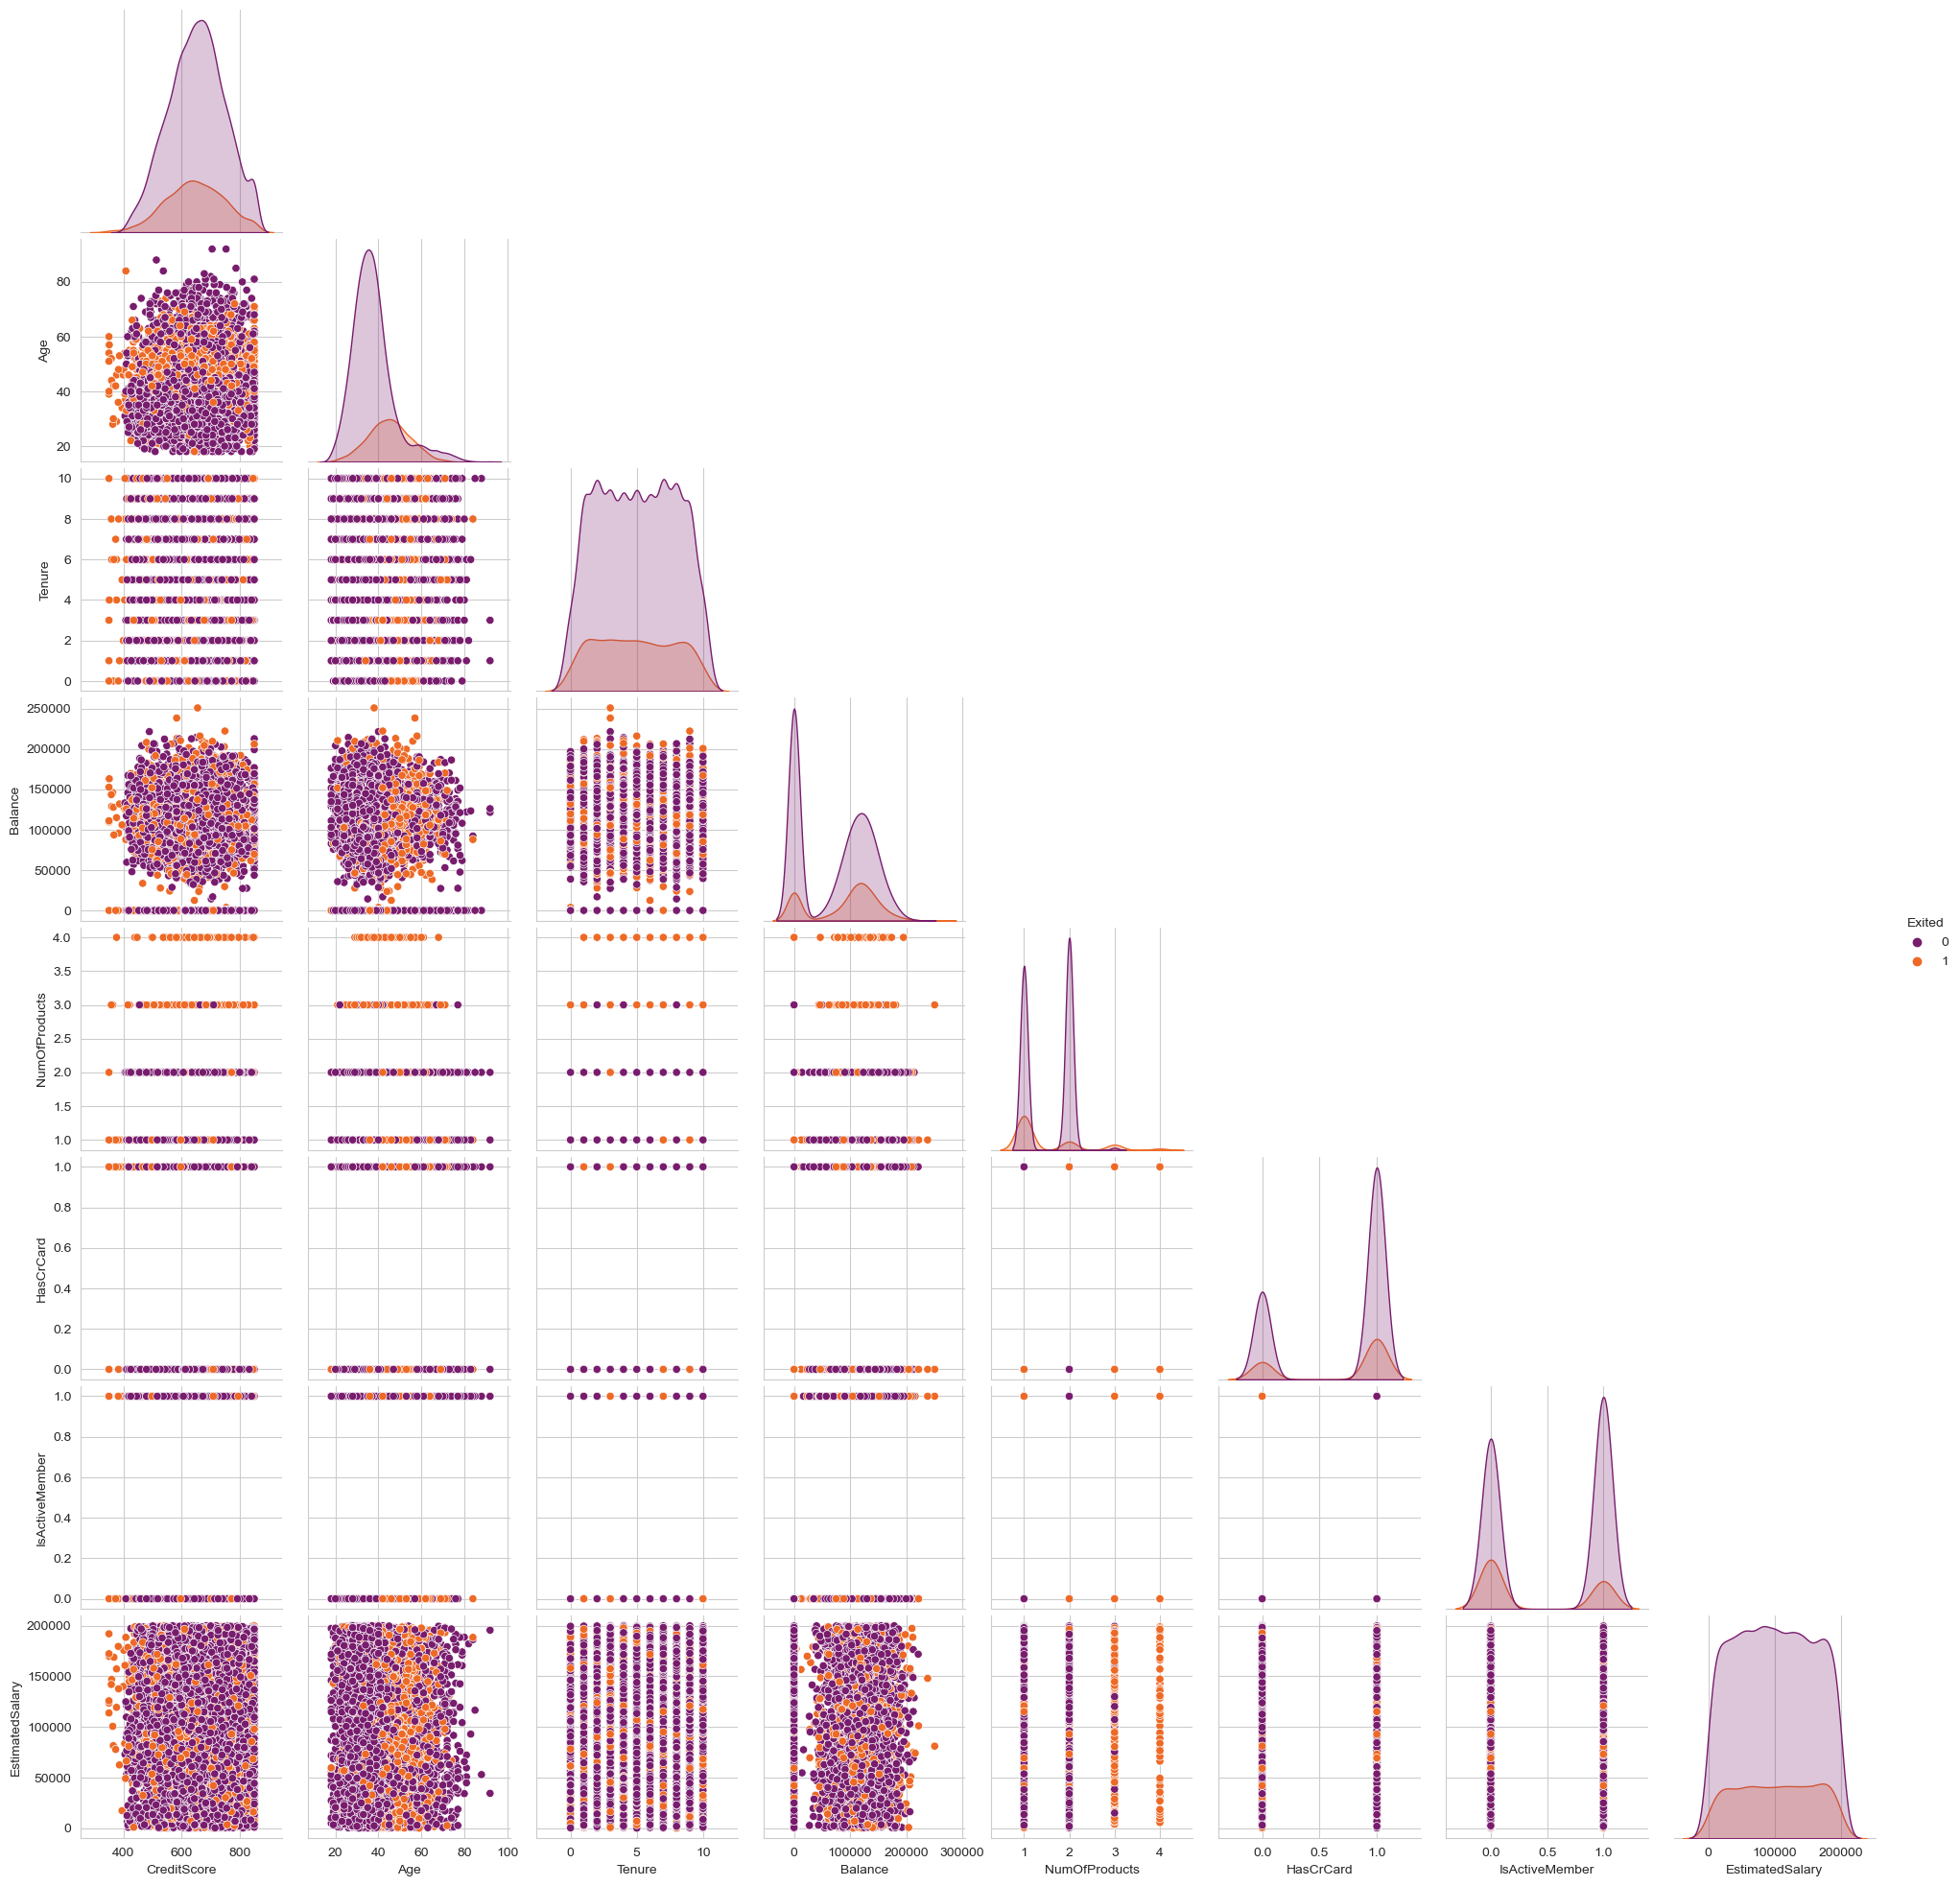

In [17]:
sns.pairplot(df, hue="Exited", palette="inferno", corner=True);

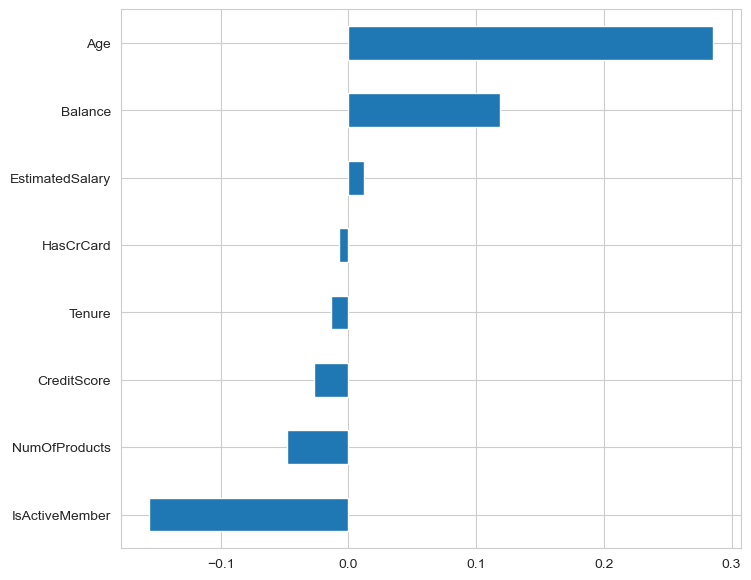

In [21]:
plt.figure(figsize = (8, 7))
df.corr(numeric_only=True)['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [22]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [23]:
df.head().T

,0,1,2,3,4
CreditScore,619.000,608.000,502.000,699.000,850.000
Age,42.000,41.000,42.000,39.000,43.000
Tenure,2.000,1.000,8.000,1.000,2.000
Balance,0.000,83807.860,159660.800,0.000,125510.820
NumOfProducts,1.000,1.000,3.000,2.000,1.000
HasCrCard,1.000,0.000,1.000,0.000,1.000
IsActiveMember,1.000,1.000,0.000,0.000,1.000
EstimatedSalary,101348.880,112542.580,113931.570,93826.630,79084.100
Exited,1.000,0.000,1.000,0.000,0.000
Geography_Germany,0.000,0.000,0.000,0.000,0.000


In [24]:
df.shape

(10000, 12)

# Preprocessing of Data
- Train | Test Split, Scalling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [26]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
## classification problemlerinde özellikle imbalanced datalarda validation_split kullanmak bizim kötü skorlar almamıza neden
# olabilir . Bundan dolayı validation_data belirlememiz gerekiyor.

In [27]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve validation datasını ayırdık.

In [29]:
scaler = MinMaxScaler()
#scaler = RobustScaler()
# ANN arka planda gradient descent çalıştırdığı için scaler'a ihtiyaç duyar.
## bütün scaling çeşitlerini deneyebiliriz RobustScaler() daha iyi skorlar verdiğinden onunla devam ediyorum.

In [30]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weight

### Create The Model

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [32]:
X_train.shape

(8100, 11)

In [33]:
X_val.shape

(900, 11)

In [34]:
X_test.shape

(1000, 11)

In [35]:
tf.keras.utils.set_random_seed(42)

# biz normalde modelin mimarisini her kurduğumuzda random olarak ağırlıkları ve bias'leri atıyor ama biz şimdi 
# bazı kavramlar göreceğiz onların farklarını görebilmek için 
# tf.keras.utils.set_random_seed(seed)  ile model her çalıştığında aynı ağırlıkları atasın istiyorum.

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer. 
model.add(Dense(1, activation = "sigmoid"))

# targetımız binary bir yapıda olduğundan  output layerda 1  nöron olacak şekilde mimamirizi oluşturuyoruz.
# activation = "sigmoid" yazdığımıza dikkat edelim hiçbir şey yazmazsak defatulu linear'di hatırlarsak.

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


# problemimiz classification problemi olduğundan loss = "binary_crossentropy" yapıyoruz .
# optimizer hyperparametresi ağırlıkları güncellerken ; 
# hangi gradient descent türünü kullanmak istediğimizle alakalıdır 'rmsprop' gibi "adam" gibi optimizer çeşitlerini deneyerek
# en iyi sonucu hangisi veriyorsa yola onunla devam etmemiz gerekir burada optimizer türü datadan dataya göre farklılık gösterir
#metrics=["accuracy"] ile, modelin accuracy'sinin de takip edilebileceğini belirtiyoruz.
# Bu, eğitim sırasında modelin accuracy'sini de izlememize olanak sağlar.

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                432       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 36) dtype=float32, numpy=
 array([[ 0.2559582 ,  0.11621267, -0.10096383,  0.32155788, -0.30151314,
          0.10885507,  0.3362143 , -0.23730654,  0.01699957,  0.09343946,
         -0.2955412 , -0.03833237,  0.33302283, -0.02119395,  0.00210544,
          0.18984216, -0.3438391 , -0.21982141,  0.0101769 , -0.30982837,
         -0.3303941 ,  0.2486533 ,  0.29686046, -0.16968586,  0.25691772,
         -0.2662028 , -0.02695045,  0.04482037,  0.04765731, -0.21426107,
         -0.20745057,  0.34955144, -0.27876642, -0.04029337, -0.16786528,
         -0.27081424],
        [ 0.16660154, -0.2269961 ,  0.12955207,  0.10748786, -0.32683128,
          0.04547349, -0.11853491, -0.08085811,  0.32479626, -0.06403145,
          0.02248827, -0.174846  , -0.26953095,  0.15422988,  0.08318803,
          0.00568494, -0.3374564 , -0.27177352,  0.20822573,  0.26166785,
         -0.04869941, -0.13308582, -0.3336716 , -0.3296454 ,  0.18512422,
          0.23482627,

In [40]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1)


#  validation_data=(X_val, y_val) yukarıda ayırdığımız validation datasını kullanıyoruz.

Epoch 1/600
254/254 [==============================] - 3s 5ms/step - loss: 0.5202 - accuracy: 0.7791 - val_loss: 0.4409 - val_accuracy: 0.7933
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4102 - accuracy: 0.8306 - val_loss: 0.3748 - val_accuracy: 0.8367
Epoch 3/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3631 - accuracy: 0.8533 - val_loss: 0.3566 - val_accuracy: 0.8433
Epoch 4/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3494 - accuracy: 0.8572 - val_loss: 0.3509 - val_accuracy: 0.8511
Epoch 5/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3434 - accuracy: 0.8611 - val_loss: 0.3513 - val_accuracy: 0.8478
Epoch 6/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3394 - accuracy: 0.8616 - val_loss: 0.3498 - val_accuracy: 0.8522
Epoch 7/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8610 - val_loss: 0.3500 - val_accuracy: 0.8533

Epoch 58/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3004 - accuracy: 0.8769 - val_loss: 0.3638 - val_accuracy: 0.8489
Epoch 59/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3012 - accuracy: 0.8764 - val_loss: 0.3665 - val_accuracy: 0.8533
Epoch 60/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3002 - accuracy: 0.8759 - val_loss: 0.3592 - val_accuracy: 0.8533
Epoch 61/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2979 - accuracy: 0.8778 - val_loss: 0.3578 - val_accuracy: 0.8556
Epoch 62/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8768 - val_loss: 0.3615 - val_accuracy: 0.8511
Epoch 63/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.8781 - val_loss: 0.3649 - val_accuracy: 0.8433
Epoch 64/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2974 - accuracy: 0.8778 - val_loss: 0.3682 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2800 - accuracy: 0.8843 - val_loss: 0.3827 - val_accuracy: 0.8544
Epoch 116/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.8860 - val_loss: 0.3901 - val_accuracy: 0.8500
Epoch 117/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.8860 - val_loss: 0.3980 - val_accuracy: 0.8511
Epoch 118/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2787 - accuracy: 0.8864 - val_loss: 0.3890 - val_accuracy: 0.8500
Epoch 119/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2792 - accuracy: 0.8867 - val_loss: 0.3868 - val_accuracy: 0.8489
Epoch 120/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2774 - accuracy: 0.8880 - val_loss: 0.3876 - val_accuracy: 0.8478
Epoch 121/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2764 - accuracy: 0.8869 - val_loss: 0.4073 - val_ac

254/254 [==============================] - 1s 3ms/step - loss: 0.2634 - accuracy: 0.8932 - val_loss: 0.4209 - val_accuracy: 0.8467
Epoch 172/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2648 - accuracy: 0.8911 - val_loss: 0.3965 - val_accuracy: 0.8456
Epoch 173/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2646 - accuracy: 0.8923 - val_loss: 0.4200 - val_accuracy: 0.8389
Epoch 174/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.8954 - val_loss: 0.4100 - val_accuracy: 0.8478
Epoch 175/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2638 - accuracy: 0.8914 - val_loss: 0.4385 - val_accuracy: 0.8433
Epoch 176/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2620 - accuracy: 0.8931 - val_loss: 0.4081 - val_accuracy: 0.8444
Epoch 177/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.8944 - val_loss: 0.4115 - val_accuracy: 0.8578

254/254 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.8973 - val_loss: 0.4590 - val_accuracy: 0.8411
Epoch 228/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.8973 - val_loss: 0.4344 - val_accuracy: 0.8400
Epoch 229/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2526 - accuracy: 0.8963 - val_loss: 0.4393 - val_accuracy: 0.8444
Epoch 230/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.8962 - val_loss: 0.4291 - val_accuracy: 0.8422
Epoch 231/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.8974 - val_loss: 0.4366 - val_accuracy: 0.8400
Epoch 232/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.8951 - val_loss: 0.4399 - val_accuracy: 0.8489
Epoch 233/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2501 - accuracy: 0.8958 - val_loss: 0.4400 - val_accuracy: 0.8500

254/254 [==============================] - 1s 3ms/step - loss: 0.2434 - accuracy: 0.9016 - val_loss: 0.4781 - val_accuracy: 0.8333
Epoch 284/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2397 - accuracy: 0.9012 - val_loss: 0.4609 - val_accuracy: 0.8311
Epoch 285/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2419 - accuracy: 0.8999 - val_loss: 0.4560 - val_accuracy: 0.8411
Epoch 286/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.9006 - val_loss: 0.4753 - val_accuracy: 0.8478
Epoch 287/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.9038 - val_loss: 0.4640 - val_accuracy: 0.8444
Epoch 288/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2389 - accuracy: 0.9017 - val_loss: 0.4537 - val_accuracy: 0.8422
Epoch 289/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2413 - accuracy: 0.9016 - val_loss: 0.4800 - val_accuracy: 0.8367

254/254 [==============================] - 1s 3ms/step - loss: 0.2347 - accuracy: 0.9010 - val_loss: 0.5104 - val_accuracy: 0.8189
Epoch 340/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2333 - accuracy: 0.9057 - val_loss: 0.4897 - val_accuracy: 0.8400
Epoch 341/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2323 - accuracy: 0.9064 - val_loss: 0.5207 - val_accuracy: 0.8322
Epoch 342/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2346 - accuracy: 0.9044 - val_loss: 0.4907 - val_accuracy: 0.8378
Epoch 343/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2327 - accuracy: 0.9046 - val_loss: 0.4984 - val_accuracy: 0.8378
Epoch 344/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2345 - accuracy: 0.9031 - val_loss: 0.4716 - val_accuracy: 0.8389
Epoch 345/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2339 - accuracy: 0.9075 - val_loss: 0.5107 - val_accuracy: 0.8378

254/254 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.9078 - val_loss: 0.5304 - val_accuracy: 0.8344
Epoch 396/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2260 - accuracy: 0.9078 - val_loss: 0.5099 - val_accuracy: 0.8311
Epoch 397/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2252 - accuracy: 0.9095 - val_loss: 0.5244 - val_accuracy: 0.8300
Epoch 398/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2251 - accuracy: 0.9089 - val_loss: 0.5198 - val_accuracy: 0.8367
Epoch 399/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9101 - val_loss: 0.5098 - val_accuracy: 0.8300
Epoch 400/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2275 - accuracy: 0.9070 - val_loss: 0.4996 - val_accuracy: 0.8433
Epoch 401/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 0.9056 - val_loss: 0.5243 - val_accuracy: 0.8333

254/254 [==============================] - 1s 3ms/step - loss: 0.2207 - accuracy: 0.9095 - val_loss: 0.5693 - val_accuracy: 0.8167
Epoch 452/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2248 - accuracy: 0.9098 - val_loss: 0.5643 - val_accuracy: 0.8267
Epoch 453/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2219 - accuracy: 0.9105 - val_loss: 0.5477 - val_accuracy: 0.8367
Epoch 454/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2193 - accuracy: 0.9111 - val_loss: 0.5509 - val_accuracy: 0.8422
Epoch 455/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.9068 - val_loss: 0.5550 - val_accuracy: 0.8389
Epoch 456/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.9114 - val_loss: 0.5263 - val_accuracy: 0.8389
Epoch 457/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.9101 - val_loss: 0.5470 - val_accuracy: 0.8300

254/254 [==============================] - 1s 3ms/step - loss: 0.2174 - accuracy: 0.9104 - val_loss: 0.5683 - val_accuracy: 0.8311
Epoch 508/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.9110 - val_loss: 0.5936 - val_accuracy: 0.8322
Epoch 509/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2185 - accuracy: 0.9098 - val_loss: 0.5823 - val_accuracy: 0.8311
Epoch 510/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2195 - accuracy: 0.9114 - val_loss: 0.5710 - val_accuracy: 0.8289
Epoch 511/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2163 - accuracy: 0.9117 - val_loss: 0.5523 - val_accuracy: 0.8344
Epoch 512/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2159 - accuracy: 0.9121 - val_loss: 0.5736 - val_accuracy: 0.8378
Epoch 513/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2181 - accuracy: 0.9106 - val_loss: 0.5527 - val_accuracy: 0.8356

254/254 [==============================] - 1s 3ms/step - loss: 0.2132 - accuracy: 0.9127 - val_loss: 0.5757 - val_accuracy: 0.8400
Epoch 564/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2155 - accuracy: 0.9146 - val_loss: 0.6174 - val_accuracy: 0.8367
Epoch 565/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2114 - accuracy: 0.9136 - val_loss: 0.5821 - val_accuracy: 0.8378
Epoch 566/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2126 - accuracy: 0.9143 - val_loss: 0.5827 - val_accuracy: 0.8344
Epoch 567/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2103 - accuracy: 0.9148 - val_loss: 0.5545 - val_accuracy: 0.8333
Epoch 568/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2128 - accuracy: 0.9115 - val_loss: 0.5806 - val_accuracy: 0.8333
Epoch 569/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2127 - accuracy: 0.9125 - val_loss: 0.5927 - val_accuracy: 0.8322

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.520,0.779,0.441,0.793
1,0.410,0.831,0.375,0.837
2,0.363,0.853,0.357,0.843
3,0.349,0.857,0.351,0.851
4,0.343,0.861,0.351,0.848


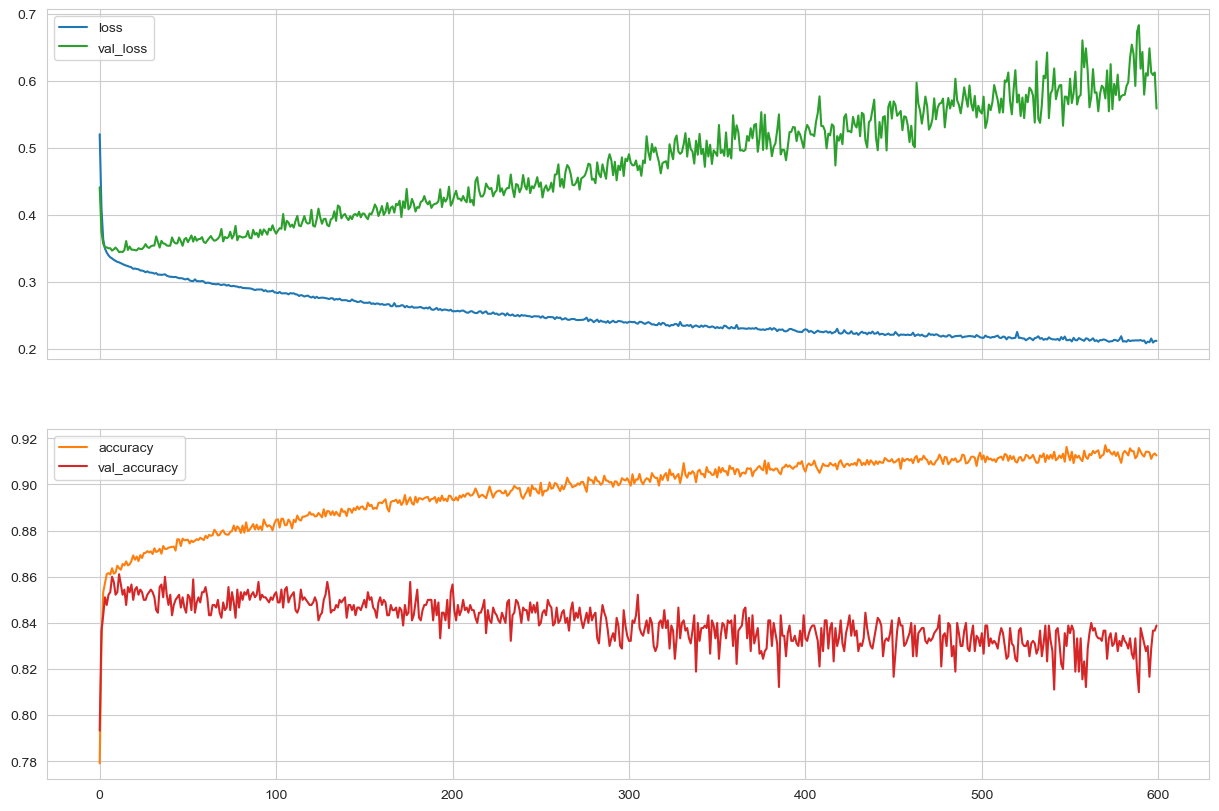

In [42]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [ ]:
#model overfittinge gittiğini görüyoruz!

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [45]:
model.evaluate(X_test, y_test, verbose=0)

[0.5650966763496399, 0.8270000219345093]

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5650966763496399
accuracy :  0.8270000219345093


In [47]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# burada predict doğrudan çalışmıyor bize olasılıklar döndürdüğü için 0.5'den yukarıda olanları 1 classına ataması için
# model.predict(X_test) > 0.5 şeklinde kullanıyoruz .

32/32 [==============================] - 0s 2ms/step
[[734  62]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       796
           1       0.60      0.46      0.52       204

    accuracy                           0.83      1000
   macro avg       0.73      0.69      0.71      1000
weighted avg       0.81      0.83      0.82      1000



In [48]:
## modelimizin test datasında skorları yüksek ama grafikte de gördük modelimiz overfittinge gitmiş bizim bu modeli overfitinden 
## kurtarmamız gerekecek.Çünkü genelleme yapamıyor şu anda .

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [35]:
from sklearn.utils.class_weight import compute_class_weight

In [36]:
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

In [37]:
class_weights = {0: 0.62790698, 1: 2.45454545 }

In [38]:
tf.keras.utils.set_random_seed(42)
model_weighted = Sequential()

model_weighted.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model_weighted.add(Dense(18, activation = "relu"))
model_weighted.add(Dense(9, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))  


model_weighted.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [89]:
model_weighted.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 36)                432       
                                                                 
 dense_30 (Dense)            (None, 18)                666       
                                                                 
 dense_31 (Dense)            (None, 9)                 171       
                                                                 
 dense_32 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [40]:
model_weighted.fit(x = X_train, 
                   y = y_train,
                   validation_data=(X_val, y_val),
                   batch_size = 32, 
                   epochs = 600, 
                   verbose=1, 
                   callbacks = [early_stop], 
                   class_weight = class_weights)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.6594 - accuracy: 0.5390 - val_loss: 0.6605 - val_accuracy: 0.6333
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5846 - accuracy: 0.7007 - val_loss: 0.5788 - val_accuracy: 0.7089
Epoch 3/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.7327 - val_loss: 0.5392 - val_accuracy: 0.7444
Epoch 4/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5234 - accuracy: 0.7501 - val_loss: 0.4753 - val_accuracy: 0.7900
Epoch 5/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.7632 - val_loss: 0.5259 - val_accuracy: 0.7489
Epoch 6/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4941 - accuracy: 0.7641 - val_loss: 0.5156 - val_accuracy: 0.7511
Epoch 7/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4848 - accuracy: 0.7719 - val_loss: 0.5324 - val_accuracy: 0.7456

In [41]:
model_weighted.history.history

{'loss': [0.6594272255897522,
  0.5846374034881592,
  0.550021231174469,
  0.5233951210975647,
  0.502712607383728,
  0.4941023886203766,
  0.484768271446228,
  0.48052188754081726,
  0.4744431674480438,
  0.4707268476486206,
  0.4696817100048065,
  0.46758654713630676,
  0.4675056040287018,
  0.4650968611240387,
  0.4642833173274994,
  0.4631938636302948,
  0.46115371584892273,
  0.4593770205974579,
  0.4573003351688385,
  0.45633232593536377,
  0.4561006724834442,
  0.45310595631599426,
  0.4580300748348236,
  0.45414087176322937,
  0.4543267786502838,
  0.4484465718269348,
  0.45179516077041626,
  0.45176541805267334,
  0.44743287563323975,
  0.44882285594940186,
  0.4475536644458771,
  0.4458845257759094,
  0.4443804919719696,
  0.4439292848110199,
  0.4433455169200897,
  0.4453114867210388,
  0.44365251064300537,
  0.44085195660591125,
  0.44222575426101685,
  0.43987616896629333,
  0.43932101130485535,
  0.43831706047058105,
  0.43967923521995544,
  0.43796291947364807,
  0.43736

In [42]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.659,0.539,0.661,0.633
1,0.585,0.701,0.579,0.709
2,0.550,0.733,0.539,0.744
3,0.523,0.750,0.475,0.790
4,0.503,0.763,0.526,0.749


In [43]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.44398966431617737
accuracy :  0.7950000166893005


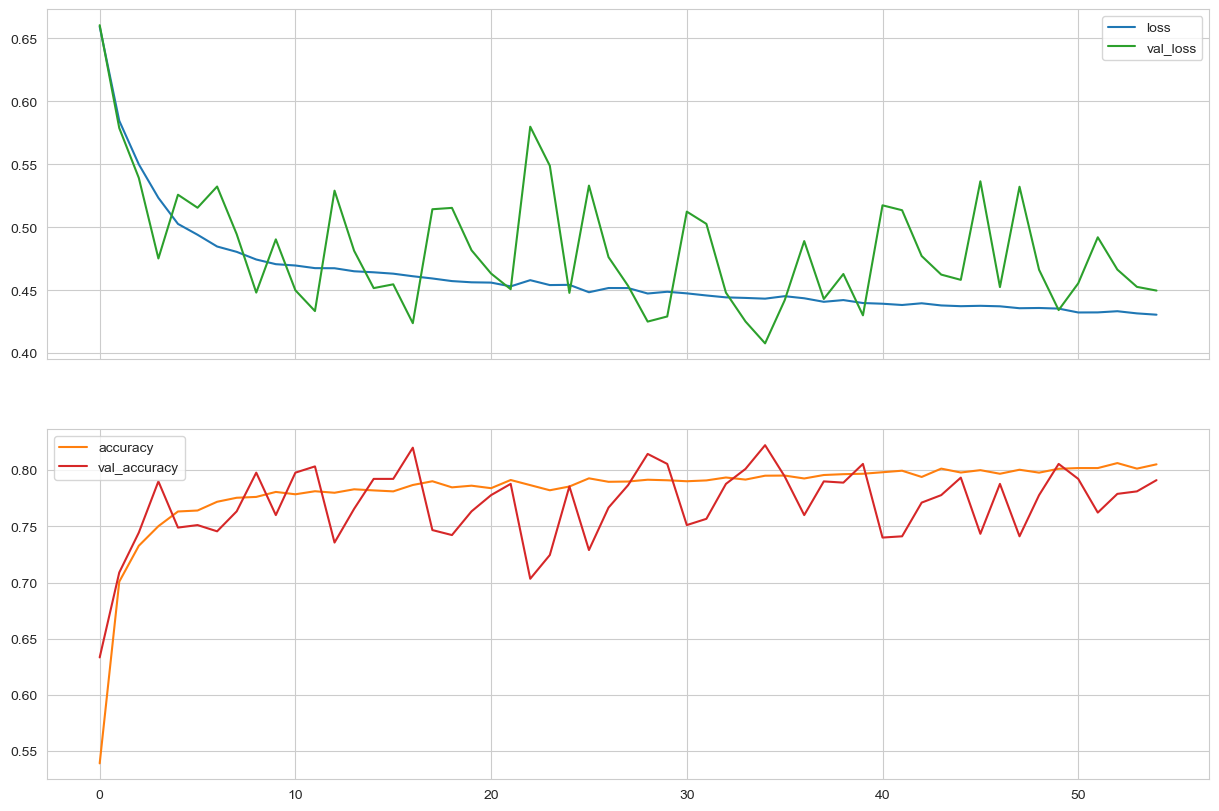

In [44]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [45]:
model_weighted.evaluate(X_test, y_test, verbose=0)

[0.44398966431617737, 0.7950000166893005]

In [46]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.44398966431617737
accuracy :  0.7950000166893005


In [47]:
y_pred = model_weighted.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 1ms/step
[[647 149]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.50      0.73      0.59       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.83      0.80      0.81      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## Optuna

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction